# Bắt đầu

### Mô tả:
Bộ dữ liệu: chứa thông tin về các loại rượu vang đỏ, mỗi mẫu rượu được mô tả bởi nhiều thuộc tính hóa học (features). Mục tiêu: Xây dựng mô hình học máy để dự đoán chất lượng rượu vang (quality) dựa trên các thông số hóa học.

### Dữ liệu vào:

fixed acidity – độ axit cố định

volatile acidity – độ axit bay hơi

citric acid – hàm lượng axit citric

residual sugar – đường dư

chlorides – nồng độ muối (clorua)

free sulfur dioxide – SO₂ tự do

total sulfur dioxide – tổng lượng SO₂

density – mật độ rượu

pH – độ pH

sulphates – hàm lượng sunphat

alcohol – nồng độ cồn

### Kết quả:
quality – điểm số chất lượng rượu (thường từ 0 đến 10, nhưng thực tế dữ liệu chủ yếu từ 3 đến 8).

##  Phân tích dữ liệu (Analyze Data)
#### (1) **Hiển thị một số thông tin về dữ liệu**
+ Số dòng, số cột của dữ liệu
+ Kiểu dữ liệu của từng cột
+ 5 dòng đầu và 5 dòng cuối của bảng dữ liệu
+ Thông tin chung về dữ liệu

In [53]:
import pandas as pd

# Đọc dữ liệu
wine = pd.read_csv("winequality-red.csv")

# Số dòng và số cột
print("Kích thước dữ liệu:", wine.shape)  

# Kiểu dữ liệu của từng cột
print("\nKiểu dữ liệu của từng cột:")
print(wine.dtypes)

# 5 dòng đầu
print("\n5 dòng đầu:")
print(wine.head())

# 5 dòng cuối
print("\n5 dòng cuối:")
print(wine.tail())

# Thông tin chung về dữ liệu
print("\nThông tin tổng quan:")
print(wine.info())


Kích thước dữ liệu: (1599, 12)

Kiểu dữ liệu của từng cột:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

5 dòng đầu:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  

Nhận xét: 

Dữ liệu sạch, không thiếu giá trị, tất cả đều ở dạng số. Chất lượng rượu (quality) là biến mục tiêu (target), còn lại là biến đầu vào (features).
Có thể tiến hành bước tiếp theo: phân tích thống kê mô tả + trực quan hóa để tìm mối quan hệ giữa các thuộc tính và chất lượng.

### Kiểm tra dữ liệu có bị thiếu và các thống kê cơ bản 

In [54]:
# --- Kiểm tra dữ liệu thiếu ---
print("Số lượng giá trị thiếu (missing values) ở mỗi cột:")
print(wine.isnull().sum())

# --- Thống kê mô tả cơ bản ---
print("\nThống kê mô tả cơ bản:")
print(wine.describe())


Số lượng giá trị thiếu (missing values) ở mỗi cột:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Thống kê mô tả cơ bản:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.

Nhận xét:

Bộ dữ liệu đầy đủ, không missing. Đa số rượu vang đỏ có chất lượng trung bình (5–6 điểm), dữ liệu hướng chất lượng rượu trung bình. Có một số thuộc tính chứa outliers (đặc biệt sulphates, chlorides, residual sugar, total sulfur dioxide) có thể ảnh hưởng xấu đến thống kê mô tả (mean, std).



Note:

75% là phân vị, nếu có mẫu lớn hơn phân vị thì nó sẽ lớn hơn 75% nên khi max lớn hơn nhiều so với phân vị 75% thì có chứa outliers

### 2. Kiểm tra sự tương quan của từng thuộc tính

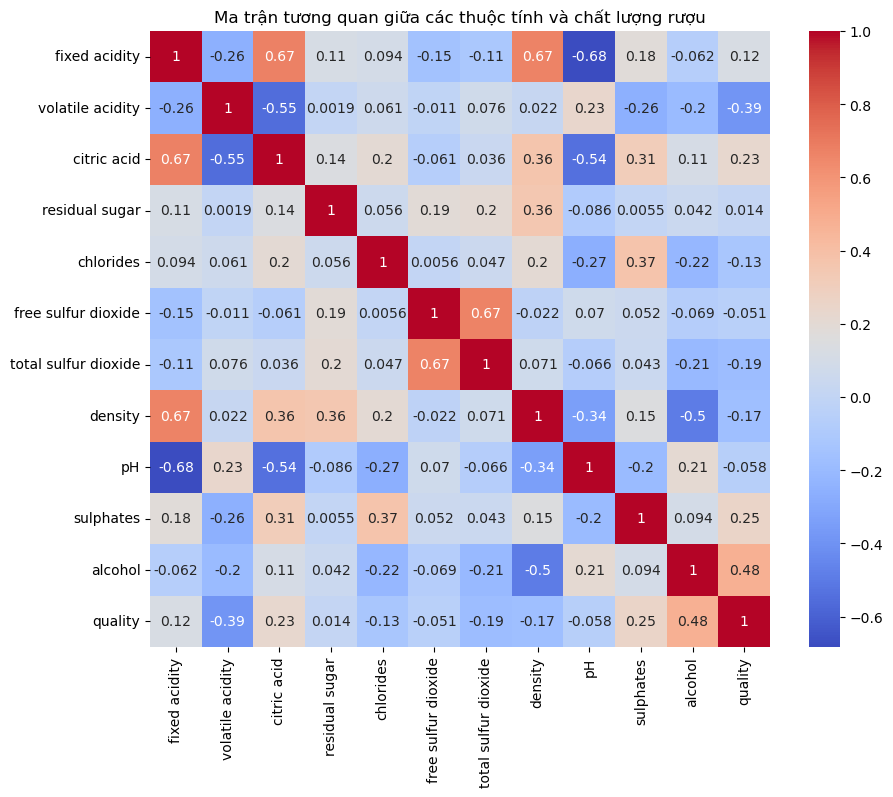

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
corr = wine.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Ma trận tương quan giữa các thuộc tính và chất lượng rượu")
plt.show()


Nhận xét:

alcohol có tương quan dương khá rõ (0.48), rượu có nồng độ cồn cao thường được đánh giá chất lượng tốt hơn. volatile acidity có tương quan âm (-0.39), nhiều acid bay hơi thì rượu bị chua, làm giảm chất lượng. citric acid (0.23) và sulphates (0.25) cũng có mối liên hệ dương nhẹ với chất lượng. Các yếu tố khác (density, pH, chlorides, residual sugar, SO₂) có tương quan rất yếu với chất lượng (< |0.2|).

### Sử dụng Univariate Feature Selection để chọn các đặc trưng quan trong 

In [56]:
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd

# Tách X và y
X = wine.drop("quality", axis=1)
y = wine["quality"]

# Chọn ra 4 thuộc tính quan trọng nhất
selector = SelectKBest(score_func=f_regression, k=4)
X_new = selector.fit_transform(X, y)

# In ra tên cột được chọn
selected_features = X.columns[selector.get_support()]
print("Các thuộc tính chọn:", selected_features.tolist())

Các thuộc tính chọn: ['volatile acidity', 'citric acid', 'sulphates', 'alcohol']


### Chuẩn bị dữ liệu cho trực quan hóa

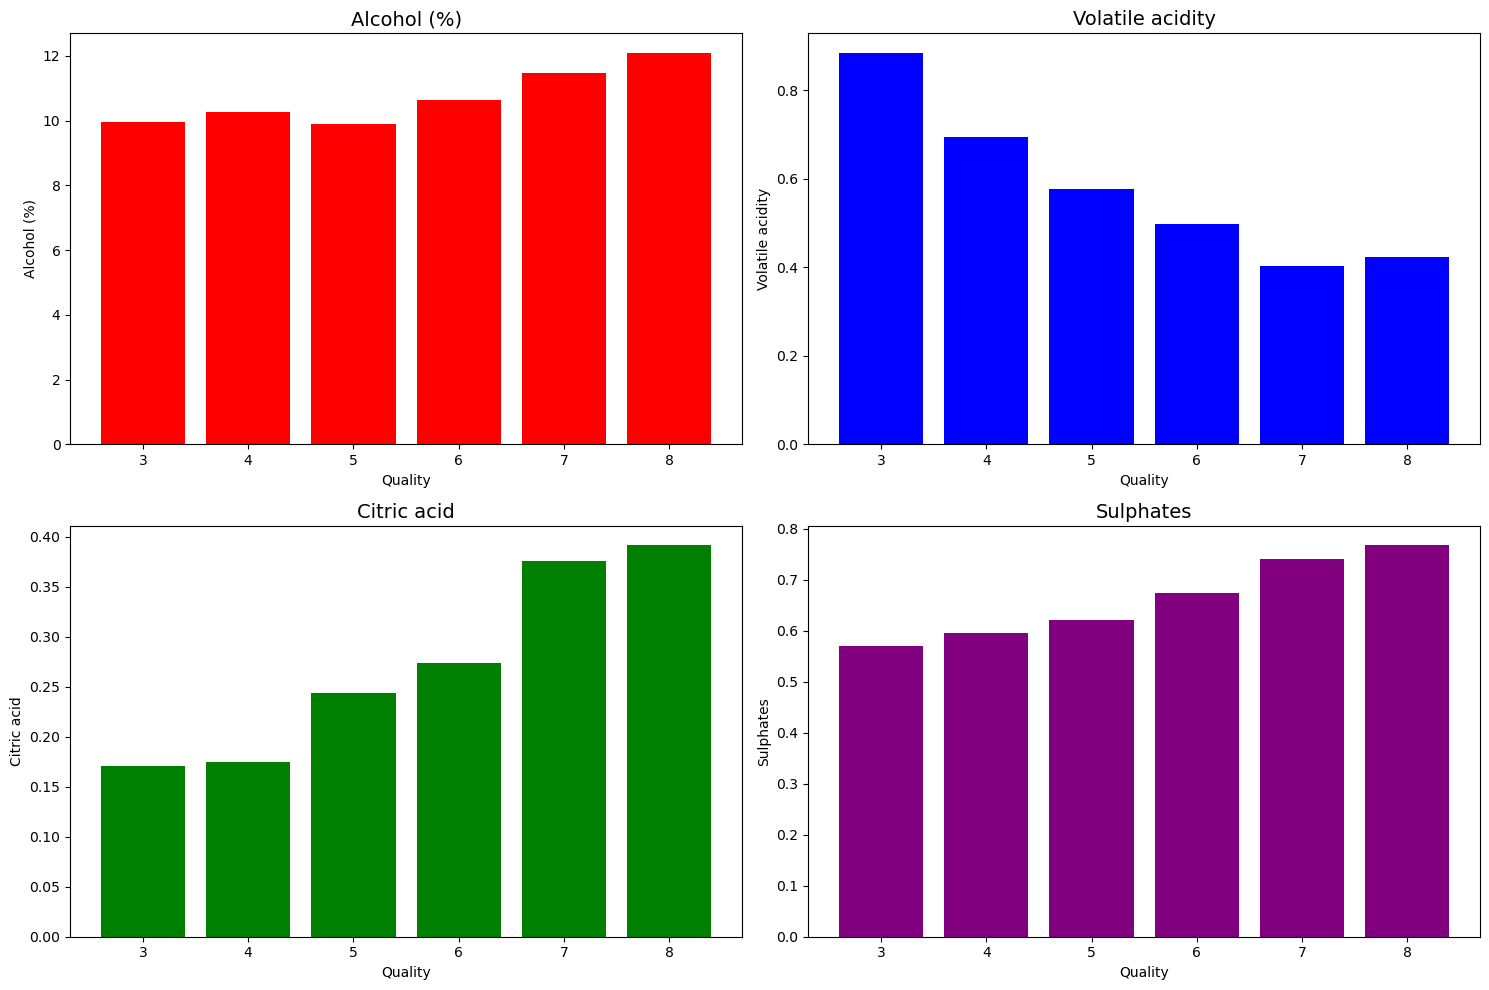

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu
wine = pd.read_csv("winequality-red.csv", sep=",")

# Chọn các cột quan trọng
wine_data = wine[['quality', 'volatile acidity', 'citric acid', 'sulphates', 'alcohol']]

# Tính trung bình theo từng mức chất lượng
wine_grouped = wine_data.groupby("quality").mean().reset_index()

# Vẽ nhiều biểu đồ
fig, ax = plt.subplots(2, 2, figsize=(15,10))

# Alcohol
ax[0,0].bar(wine_grouped['quality'], wine_grouped['alcohol'], color="red")
ax[0,0].set_title("Alcohol (%)", fontsize=14)
ax[0,0].set_xlabel("Quality")
ax[0,0].set_ylabel("Alcohol (%)")

# Volatile acidity
ax[0,1].bar(wine_grouped['quality'], wine_grouped['volatile acidity'], color="blue")
ax[0,1].set_title("Volatile acidity", fontsize=14)
ax[0,1].set_xlabel("Quality")
ax[0,1].set_ylabel("Volatile acidity")

# Citric acid
ax[1,0].bar(wine_grouped['quality'], wine_grouped['citric acid'], color="green")
ax[1,0].set_title("Citric acid", fontsize=14)
ax[1,0].set_xlabel("Quality")
ax[1,0].set_ylabel("Citric acid")

# Sulphates
ax[1,1].bar(wine_grouped['quality'], wine_grouped['sulphates'], color="purple")
ax[1,1].set_title("Sulphates", fontsize=14)
ax[1,1].set_xlabel("Quality")
ax[1,1].set_ylabel("Sulphates")

plt.tight_layout()
plt.show()


### Nhận xét:
Alcohol và Volatile acidity là 2 đặc trưng quan trọng nhất (tác động rõ ràng, độ chênh lệch lớn). Citric acid và Sulphates có tác động bổ sung, tuy xu hướng tăng nhưng mức ảnh hưởng nhỏ hơn. Rượu vang đỏ càng có độ cồn cao, ít axit bay hơi, chứa citric acid và sulphates hợp lý thì chất lượng càng cao.

Top 10 rượu có chất lượng cao nhất 

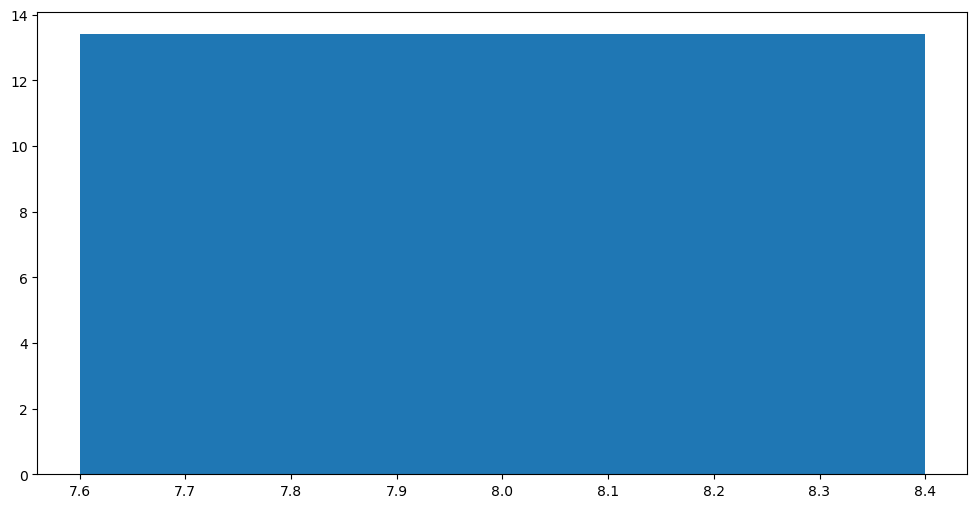

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
x = wine_sorted['quality'][0:10]
y = wine_sorted['alcohol'][0:10]

plt.bar(x, y)
plt.show()


### Nhận xét:
Top 10 rượu có chất lượng tốt nhất có giá trị alcohol tập trung chủ yếu trong khoảng 13-13.5

## Trực quan hóa với Seaborn

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13592\340854960.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="quality", data=wine, palette="Set2")


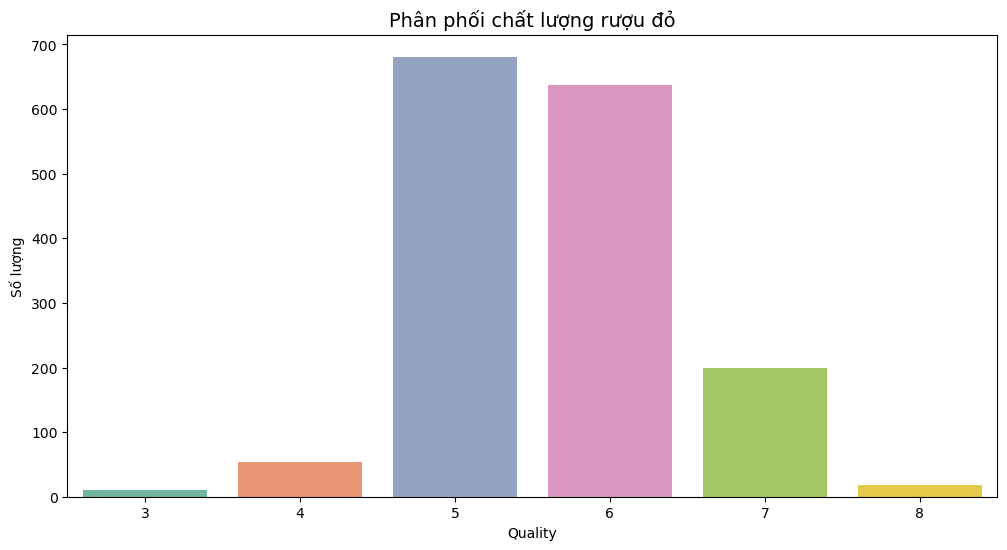

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.countplot(x="quality", data=wine, palette="Set2")
plt.title("Phân phối chất lượng rượu đỏ", fontsize=14)
plt.xlabel("Quality")
plt.ylabel("Số lượng")
plt.show()


### Nhận xét:
Phần lớn rượu có chất lượng trung bình: Chất lượng 5 và 6 chiếm tỷ lệ lớn nhất (gần như toàn bộ dataset, mỗi mức có trên 600 mẫu). Đây là mức "average quality", cho thấy đa số rượu trong tập dữ liệu có chất lượng trung bình. Rượu chất lượng cao hiếm: Chỉ có một số ít mẫu đạt chất lượng 7 hoặc 8 (dưới 250 mẫu). Chất lượng 8 đặc biệt hiếm (< 20 mẫu). Rượu chất lượng thấp cũng rất ít: Chất lượng 3 và 4 có số lượng rất nhỏ (< 70 mẫu).

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13592\1479326550.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=wine, x="quality", y="alcohol", ax=ax[0,0], palette="Set1")
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13592\1479326550.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=wine, x="quality", y="volatile acidity", ax=ax[0,1], palette="Set2")
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13592\1479326550.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=wine, x="quality", y="citric acid", ax=ax[1,0], palette="Set3")


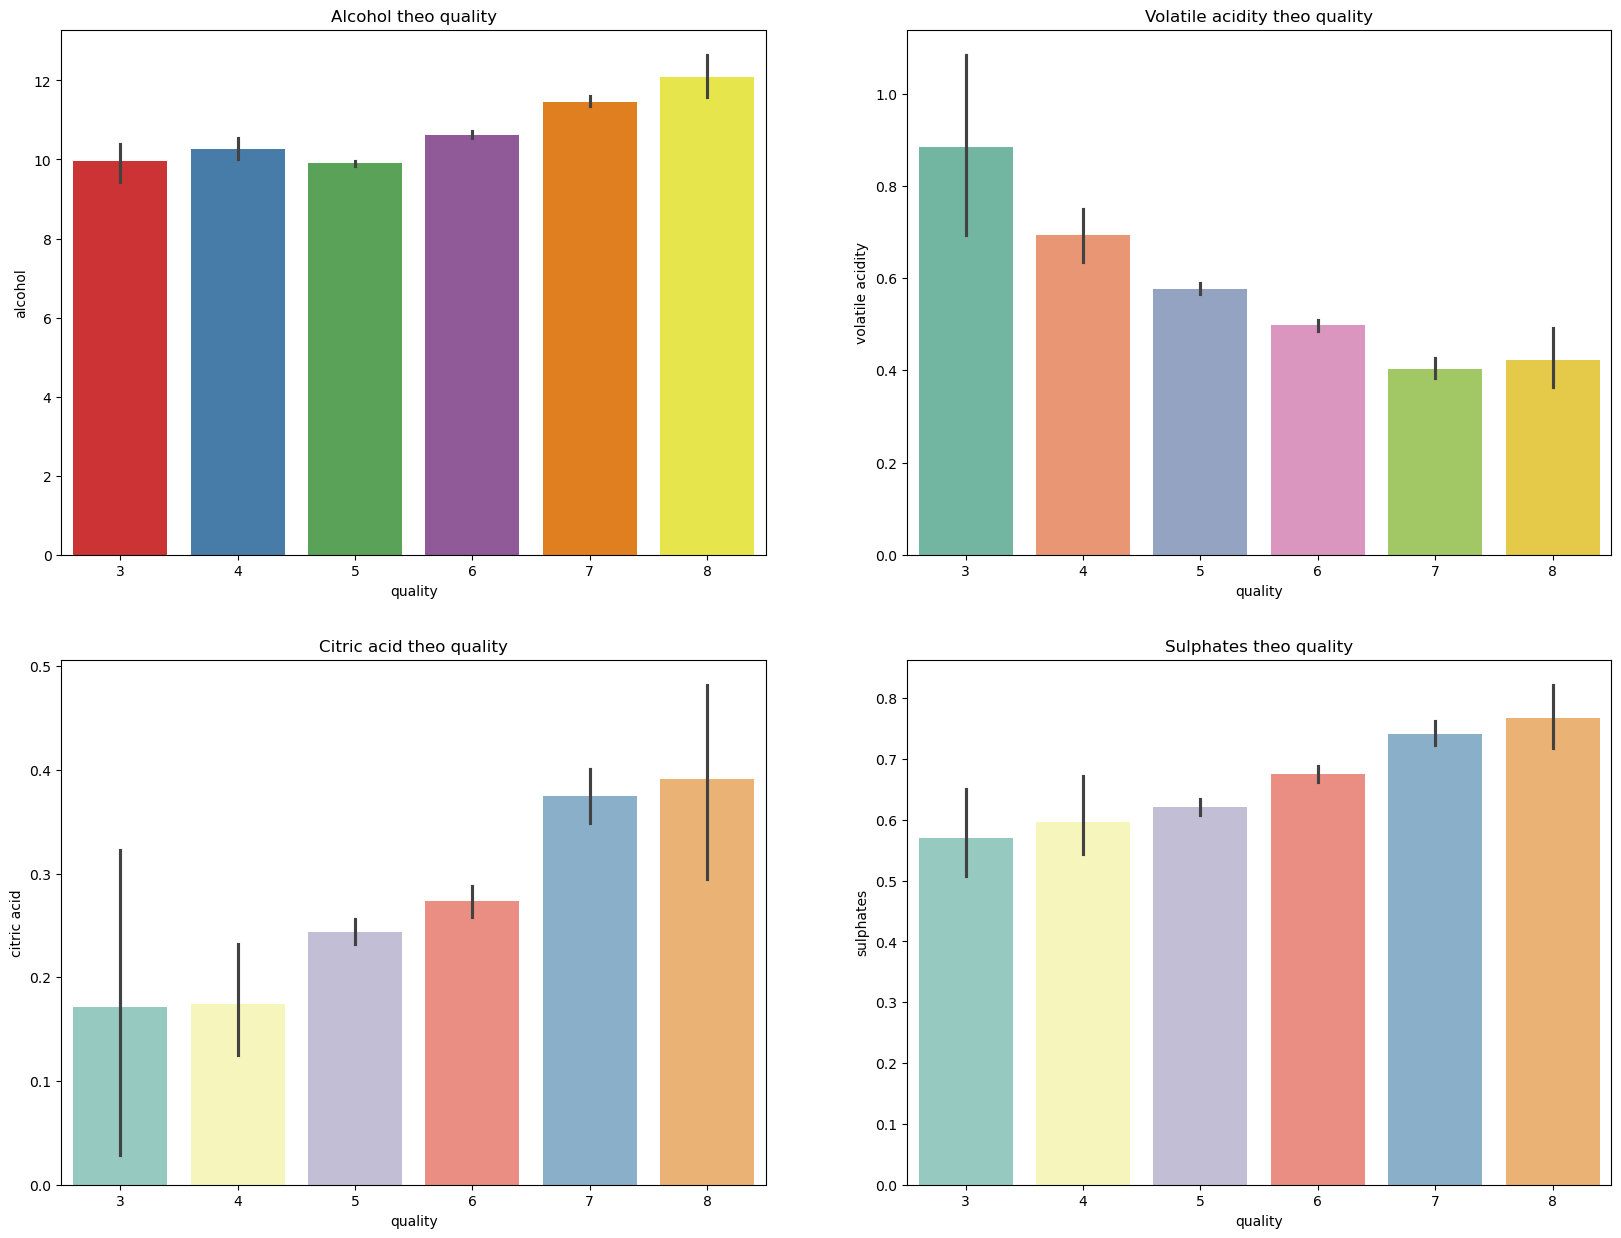

In [77]:
# Biểu đồ so sánh từng thuộc tính theo chất lượng
fig, ax = plt.subplots(2,2, figsize=(20,15))
sns.barplot(data=wine, x="quality", y="alcohol", ax=ax[0,0], palette="Set1")
sns.barplot(data=wine, x="quality", y="volatile acidity", ax=ax[0,1], palette="Set2")
sns.barplot(data=wine, x="quality", y="citric acid", ax=ax[1,0], palette="Set3")
sns.barplot(data=wine, x="quality", y="sulphates", ax=ax[1,1], palette="Set3")

ax[0,0].set_title("Alcohol theo quality")
ax[0,1].set_title("Volatile acidity theo quality")
ax[1,0].set_title("Citric acid theo quality")
ax[1,1].set_title("Sulphates theo quality")
plt.show()


### Nhận xét:
Cồn có xu hướng tăng dần theo chất lượng, Alcohol liên quan tích cực đến chất lượng. Volatile acidity (độ axit bay hơi) Giảm rõ rệt khi chất lượng tăng. Volatile acidity càng thấp, rượu càng ngon. Citric acid (axit xitric) Có xu hướng tăng dần theo chất lượng, Citric acid cao là đặc trưng của rượu ngon.
Sulphates (sunphat). Có xu hướng tăng nhẹ theo chất lượng. Sulphates cũng đóng vai trò tích cực trong chất lượng rượu, nhưng tác động yếu hơn alcohol và volatile acidity.